In [1]:
# import dependencies
import os
import glob
import pandas as pd
import numpy as np
import itertools
import category_encoders as ce

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
"""
df['accessories'] = [str(x).split(" ") for x in df['accessories']]
attributes = df['accessories'].explode().unique() 
attributes"""

In [170]:
#df1.to_csv('flask-backend/data/cryptopunks_ohe.csv')

In [2]:
"""
os.chdir("flask-backend/data/sales")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv("punks_sales.csv", index=False, encoding='utf-8-sig')"""

In [17]:
df = pd.read_csv("punks_id.csv", index_col='id')
df

,type,count,accessories
id,,,
0,Female,3,Green Eye Shadow / Earring / Blonde Bob
1,Male,2,Smile / Mohawk
2,Female,1,Wild Hair
3,Male,3,Wild Hair / Nerd Glasses / Pipe
4,Male,4,Big Shades / Wild Hair / Earring / Goat
...,...,...,...
9995,Female,2,Purple Eye Shadow / Straight Hair Dark
9996,Male,4,Cigarette / Earring / Crazy Hair / Smile
9997,Zombie,2,Front Beard / Cap Forward


In [3]:
df = pd.read_csv("flask-backend/data/cryptopunks_ohe.csv", index_col='id')
df.head()

,Alien,Ape,Female,Male,Zombie,3D_Glasses,Bandana,Beanie,Big_Beard,Big_Shades,...,Tiara,Top_Hat,VR,Vampire_Hair,Vape,Welding_Goggles,Wild_Blonde,Wild_Hair,Wild_White_Hair,None
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df = pd.read_csv("flask-backend/data/punks_sales.csv")
df.head()

,timestamp,id,price (in eth),price (in wei),from,to,block,tx
0,2017-06-23 21:05:06 UTC,544,0.01,10000000000000000,0xc352b534e8b987e036a93539fd6897f53488e56a,0x0000000000000000000000000000000000000000,3919706,0xb28b5f2c186bf534e4fc4b8604b1496c9632e422694...
1,2017-06-23 21:10:32 UTC,3134,0.01,10000000000000000,0x5b098b00621eda6a96b7a476220661ad265f083f,0xc352b534e8b987e036a93539fd6897f53488e56a,3919721,0x65579455ac3227e7b3db72b4e359e988bb16cae6d26...
2,2017-06-23 21:46:53 UTC,5056,0.1,100000000000000000,0xc352b534e8b987e036a93539fd6897f53488e56a,0x00bd9fd57c423a1b1c969823d409156d90974d77,3919847,0xd79cca9282c06a0edb8f9426aae734119f0f2ed0d96...
3,2017-06-23 21:57:45 UTC,5719,0.04,40000000000000000,0x5b098b00621eda6a96b7a476220661ad265f083f,0x00bd3a6660309fb9e0129b9b777a9ccb9c2869dc,3919887,0x03c36b107006386b2db0e77667cc3fd4321d0366843...
4,2017-06-23 22:00:12 UTC,6548,0.03,30000000000000000,0x5b098b00621eda6a96b7a476220661ad265f083f,0x00bd3a6660309fb9e0129b9b777a9ccb9c2869dc,3919893,0x85467bb2cbbdbea4542baa0307729e8a8c1a119dcf5...


In [7]:
df['Attributes'] = df.count(axis=1)

In [8]:
df

,Alien,Ape,Female,Male,Zombie,3D_Glasses,Bandana,Beanie,Big_Beard,Big_Shades,...,Top_Hat,VR,Vampire_Hair,Vape,Welding_Goggles,Wild_Blonde,Wild_Hair,Wild_White_Hair,None,Attributes
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,93
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,93
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93
9996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93
9997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,93


In [167]:
mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('accessories')),
                index=df.index,
                columns=mlb.classes_))

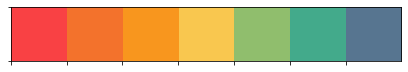

In [5]:
#Colors to be used in the plots
color = ["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

In [ ]:
# dataset
df = pd.read_csv("")

In [ ]:
# target and features
target = ''

X = df.drop(columns=target)
y = df[target]

# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.25 ,random_state=11)

In [ ]:
# Define a function that compares the CV perfromance of a set of predetrmined models 
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()
    maes = []
    mses = []
    r2s = []
    accs = []
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        mae = -np.round(cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv), 4)
        maes.append(mae)
        mae_avg = round(mae.mean(), 4)
        mse = -np.round(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv), 4)
        mses.append(mse)
        mse_avg = round(mse.mean(), 4)
        r2 = np.round(cross_val_score(model, X, y, scoring='r2', cv=cv), 4)
        r2s.append(r2)
        r2_avg = round(r2.mean(), 4)
        acc = np.round((100 - (100 * (mae * len(X))) / sum(y)), 4)
        accs.append(acc)
        acc_avg = round(acc.mean(), 4)
        cv_accuracies[str(model)] = [mae_avg, mse_avg, r2_avg, acc_avg]
    cv_accuracies.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return cv_accuracies, maes, mses, r2s, accs

In [ ]:
# Create the models to be tested
mlr_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
xgb_reg = xgb_regressor = xgb.XGBRegressor(random_state=42)

# Put the models in a list to be used for Cross-Validation
models = [mlr_reg, rf_reg, xgb_reg]

# Run the Cross-Validation comparison with the models used in this analysis
comp, maes, mses, r2s, accs = cv_comparison(models, X_train, y_train, 4)

In [ ]:
# Create DataFrame for all R^2s
r2_comp = pd.DataFrame(r2s, index=comp.columns, columns=['1st Fold', '2nd Fold', '3rd Fold', 
                                                         '4th Fold'])

# Add a column for the averages
r2_comp['Average'] = np.round(r2_comp.mean(axis=1),4)
r2_comp

In [ ]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

In [ ]:
# Create the model to be tuned
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# View the best parameters from the random search
rf_random.best_params_

In [ ]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

In [ ]:
# Create the model to be tuned
xgb_base = xgb.XGBRegressor()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 15, cv = 3, verbose = 2, 
                                random_state = 420, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train, y_train)

# Get the optimal parameters
xgb_random.best_params_

In [ ]:
# Create the final Multiple Linear Regression
mlr_final = LinearRegression()

# Create the final Random Forest
rf_final = RandomForestRegressor(n_estimators = 100,
                                 min_samples_split = 6,
                                 min_impurity_decrease = 0.0,
                                 max_features = 'sqrt',
                                 max_depth = 25,
                                 criterion = 'mae',
                                 bootstrap = True,
                                 random_state = 42)

# Create the fnal Extreme Gradient Booster
xgb_final = xgb.XGBRegressor(tree_method = 'exact',
                         objective = 'reg:squarederror',
                         n_estimators = 1600,
                         min_child_weight = 6,
                         max_depth = 8,
                         gamma = 0,
                         eta = 0.1,
                         random_state = 42)

# Train the models using 80% of the original data
mlr_final.fit(X_train, y_train)
rf_final.fit(X_train, y_train)
xgb_final.fit(X_train, y_train)

In [ ]:
# Define a function that compares all final models
def final_comparison(models, test_features, test_labels):
    scores = pd.DataFrame()
    for model in models:
        predictions = model.predict(test_features)
        mae = round(mean_absolute_error(test_labels, predictions), 4)
        mse = round(mean_squared_error(test_labels, predictions), 4)
        r2 = round(r2_score(test_labels, predictions), 4)
        errors = abs(predictions - test_labels)
        mape = 100 * np.mean(errors / test_labels)
        accuracy = round(100 - mape, 4)
        scores[str(model)] = [mae, mse, r2, accuracy]
    scores.index = ['Mean Absolute Error', 'Mean Squared Error', 'R^2', 'Accuracy']
    return scores

In [ ]:
# Call the comparison function with the three final models
final_scores = final_comparison([mlr_final, rf_final, xgb_final], X_test, y_test)

# Adjust the column headers
final_scores.columns  = ['Linear Regression', 'Random Forest', 'Extreme Gradient Boosting']